In [7]:
print('Hola')

Hola


Get the data 

In [5]:
import pandas as pd 
Data = pd.read_pickle('AgesAndHeights.pkl')
Data

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [3]:
import matplotlib.pyplot as plt 

<AxesSubplot:>

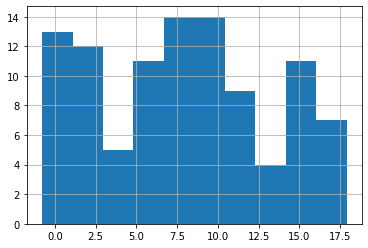

In [7]:
Data['Age'].hist()

<AxesSubplot:>

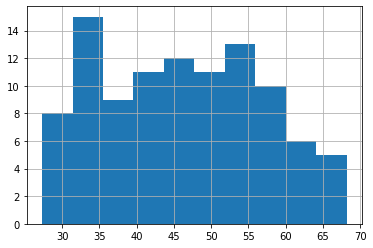

In [8]:
Data['Height'].hist()

In [9]:
Data.describe()

,Age,Height
count,100.000000,100.000000
mean,7.966138,45.955674
std,5.321621,10.787318
min,-0.780853,27.332513
25%,3.048885,36.320107
50%,7.795597,46.178251
75%,11.464331,53.994166
max,17.887852,68.170414


# Clean Data

In [13]:
(Data['Age']<0).value_counts()

False    93
True      7
Name: Age, dtype: int64

In [14]:
Data[Data['Age']>0]

,Age,Height
0,14.767874,59.627484
1,3.107671,36.146453
2,7.266917,46.912878
3,1.815180,29.125660
4,16.753758,68.170414
...,...,...
95,7.323712,46.857505
96,5.591509,39.339990
97,2.625606,32.918925
98,5.519293,40.704154


In [15]:
cleaned_data = Data[Data['Age']>0]

# Visualize the Data  

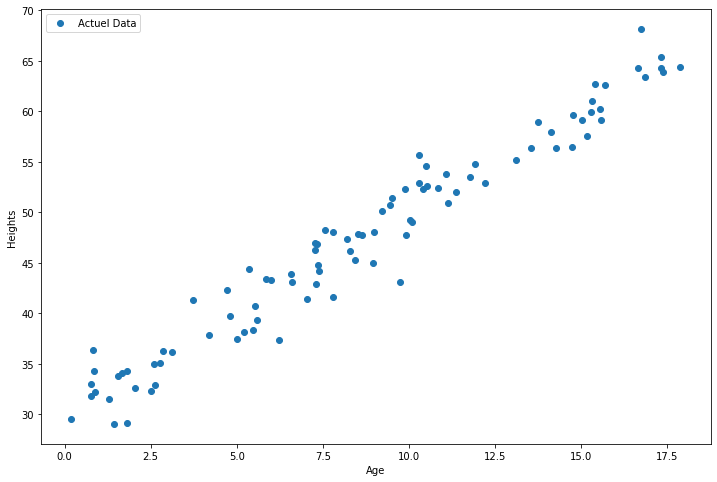

In [25]:
from matplotlib.pyplot import figure

figure(figsize=(12,8))

x = cleaned_data['Age']
y = cleaned_data['Height']
plt.scatter(x , y , label = 'Actuel Data')
plt.xlabel('Age')
plt.ylabel('Heights')
plt.legend()

Linear rigression Model

In [26]:
parameters = {'alpha' : 2, 'beta' : 1}

In [27]:
def model(x , prams): 
    coff = prams['alpha']
    intrcept = prams['beta']
    
    y_hat = coff* x + intrcept
    
    return y_hat
    
    

In [29]:
model(4,parameters)

9

In [30]:
def training_model(data , params ) : 
    x  , y  =  data['Age'],data['Height']  
    
    x_bar = x.mean()
    y_bar = y.mean()
    
    x,y = x.to_numpy() ,y.to_numpy()
    
    alpha =  sum( ((x - x_bar) * (y - y_bar)) /  sum( (x -x_bar)**2))
    beta  =  y_bar -  alpha*x_bar 
    
    params['alpha'] =  alpha
    params['beta'] =  beta

In [69]:
new_params = {'alpha' : 4 ,'beta': 2 }
new_params_copy = new_params.copy()

In [71]:
x_range = list(range(19)) 
y_range = [model(x,new_params_copy) for x in x_range]

In [70]:
[model(x,new_params_copy) for x in x_range]

[2, 6, 10, 14, 18, 22, 26, 30, 34, 38, 42, 46, 50, 54, 58, 62, 66, 70, 74]

In [73]:
#Training the new Prametres 
training_model(cleaned_data,new_params)
new_params

{'alpha': 2.0014168989106316, 'beta': 29.96185761461583}

In [74]:
y_range_trained = [model(x,new_params) for x in x_range]

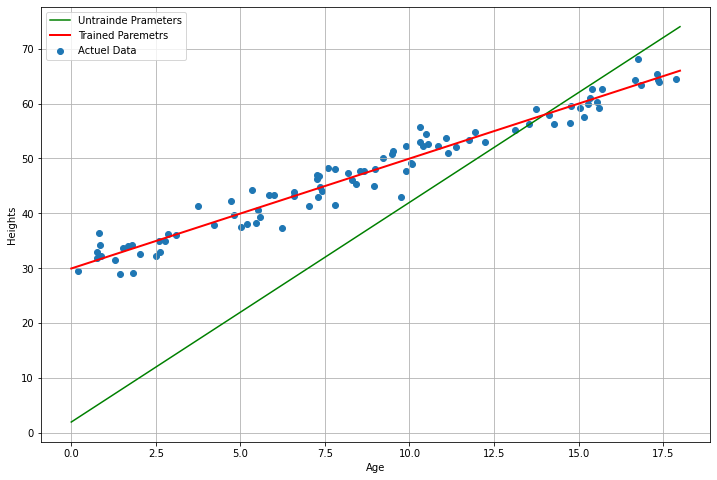

In [78]:
figure(figsize=(12,8))

x = cleaned_data['Age']
y = cleaned_data['Height']
plt.scatter(x , y , label = 'Actuel Data')
plt.plot(x_range,y_range,label = 'Untrainde Prameters',color = 'green')
plt.plot(x_range,y_range_trained,label = 'Trained Paremetrs',  color= 'red',lw = 2)
plt.xlabel('Age')
plt.ylabel('Heights')
plt.legend()
plt.grid()

In [80]:
#predict Some Value 

model(20,new_params)

69.99019559282846